<a href="https://colab.research.google.com/github/merkington/horror/blob/main/_pandacrimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

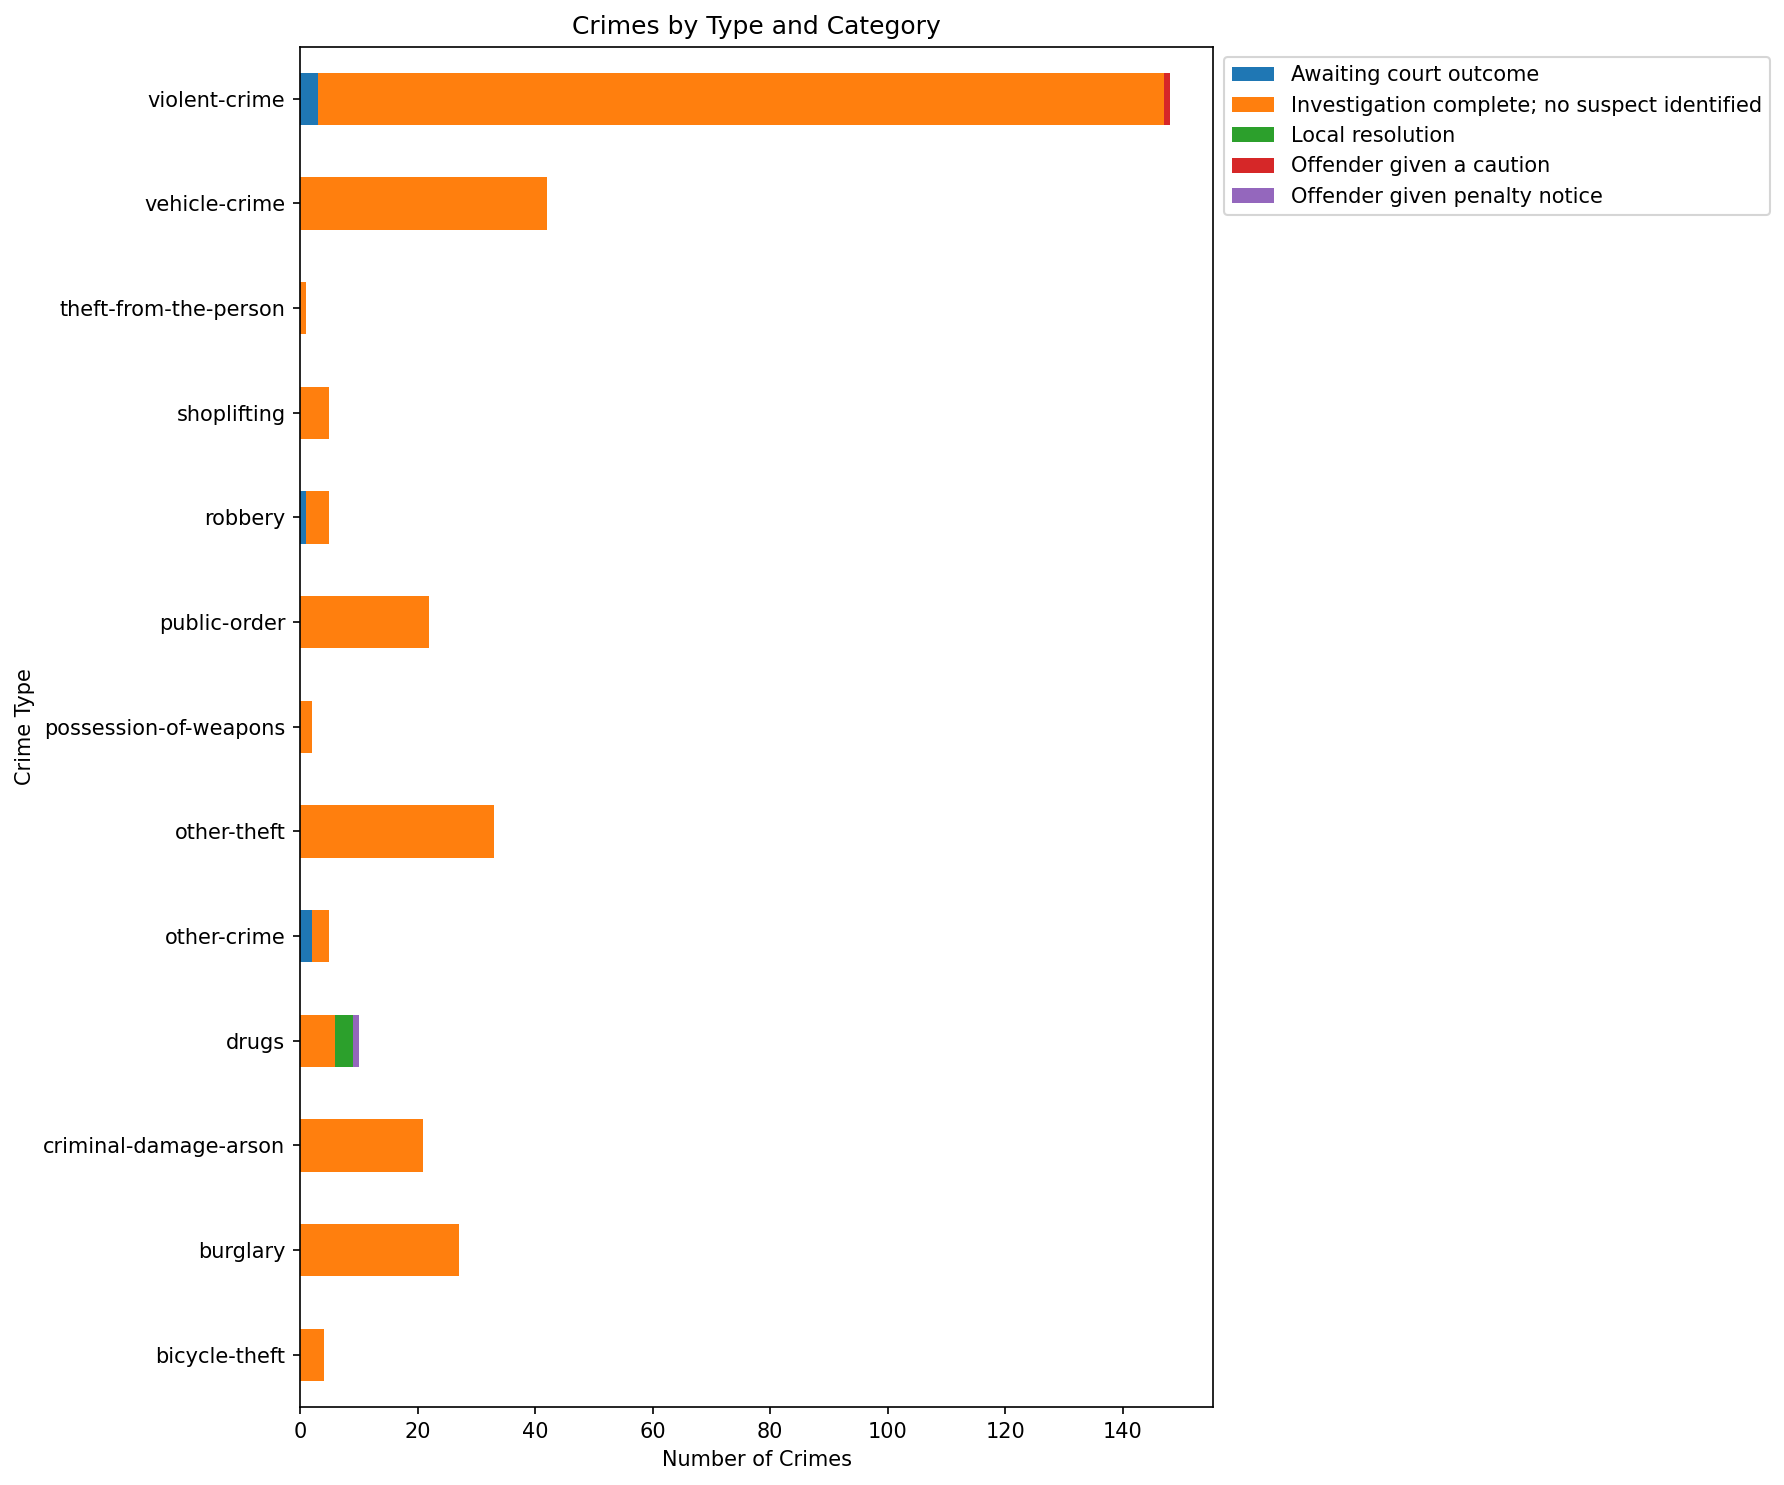

In [89]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Set the API parameters
parameters = {
    "lat": 51.5018,
    "lng": 0.0910
}

try:
    # Make a request to the API and get the JSON data
    response = requests.get("https://data.police.uk/api/outcomes-at-location", params=parameters)
    response.raise_for_status()  # Raise an exception if the request fails
    data = response.json()

    # Convert the JSON data to a Pandas DataFrame
    df = pd.json_normalize(data)

    # Group the data by crime type and crime category, and count the number of crimes per category
    grouped = df.groupby(["crime.category", "category.name"]).size().unstack(fill_value=0)

    # Plot the results as a stacked horizontal bar chart
    fig, ax = plt.subplots(figsize=(12, 10), dpi=150)  # set the size and dpi of the figure
    grouped.plot(kind="barh", stacked=True, ax=ax)
    ax.set_xlabel("Number of Crimes")
    ax.set_ylabel("Crime Type")
    ax.set_title("Crimes by Type and Category")
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))  # move the legend to the bottom right
    plt.tight_layout()  # adjust the padding
    plt.show()

except requests.exceptions.RequestException as e:
    print(e)
